In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [3]:
#importing dataset
df = pd.read_csv("earthquake.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-01-01T22:05:38.960Z,35.6831,140.2344,66.24,4.4,mb,NaN,141.0,1.855,0.66,...,2019-03-08T17:50:13.040Z,"3 km S of Sakura, Japan",earthquake,2.9,8.6,0.115,22,reviewed,us,us
1,2019-01-02T15:11:16.070Z,39.4417,143.6408,21.01,4.5,mb,NaN,110.0,2.390,0.85,...,2019-03-08T17:50:21.040Z,"145 km E of Yamada, Japan",earthquake,9.1,6.4,0.180,9,reviewed,us,us
2,2019-01-03T09:10:28.440Z,33.0514,130.4705,10.00,4.7,mb,NaN,97.0,0.348,0.60,...,2020-07-10T17:21:55.993Z,"2 km NE of ?muta, Japan",earthquake,4.9,1.8,0.075,54,reviewed,us,us
3,2019-01-03T20:42:45.260Z,30.3888,138.0987,451.33,4.0,mb,NaN,113.0,3.085,0.75,...,2019-03-08T17:50:21.040Z,"Izu Islands, Japan region",earthquake,11.0,5.8,0.073,50,reviewed,us,us
4,2019-01-04T22:05:07.080Z,32.8198,140.1248,98.35,4.3,mb,NaN,147.0,0.394,0.46,...,2019-03-08T17:50:21.040Z,"233 km SSE of Shimoda, Japan",earthquake,12.0,4.7,0.080,44,reviewed,us,us


In [4]:
#size of dataset
df.shape

(2535, 22)

In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2535 non-null   object 
 1   latitude         2535 non-null   float64
 2   longitude        2535 non-null   float64
 3   depth            2535 non-null   float64
 4   mag              2535 non-null   float64
 5   magType          2535 non-null   object 
 6   nst              1 non-null      float64
 7   gap              2535 non-null   float64
 8   dmin             2535 non-null   float64
 9   rms              2535 non-null   float64
 10  net              2535 non-null   object 
 11  id               2535 non-null   object 
 12  updated          2535 non-null   object 
 13  place            2530 non-null   object 
 14  type             2535 non-null   object 
 15  horizontalError  2535 non-null   float64
 16  depthError       2535 non-null   float64
 17  magError      

In [6]:
# <5 -> Safe
# 5 - 6 -> Precautions
# >6 -> Danger
predictions = []
for i in range(len(df)):
    if df["mag"][i] < 5:
        predictions.append("Safe")
    elif 5<=df["mag"][i] <= 6:
        predictions.append("Precaution")
    else:
        predictions.append("Danger")
df["predictions"] = predictions

In [7]:
df


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,predictions
0,2019-01-01T22:05:38.960Z,35.6831,140.2344,66.24,4.4,mb,NaN,141.0,1.855,0.66,...,"3 km S of Sakura, Japan",earthquake,2.9,8.6,0.115,22,reviewed,us,us,Safe
1,2019-01-02T15:11:16.070Z,39.4417,143.6408,21.01,4.5,mb,NaN,110.0,2.390,0.85,...,"145 km E of Yamada, Japan",earthquake,9.1,6.4,0.180,9,reviewed,us,us,Safe
2,2019-01-03T09:10:28.440Z,33.0514,130.4705,10.00,4.7,mb,NaN,97.0,0.348,0.60,...,"2 km NE of ?muta, Japan",earthquake,4.9,1.8,0.075,54,reviewed,us,us,Safe
3,2019-01-03T20:42:45.260Z,30.3888,138.0987,451.33,4.0,mb,NaN,113.0,3.085,0.75,...,"Izu Islands, Japan region",earthquake,11.0,5.8,0.073,50,reviewed,us,us,Safe
4,2019-01-04T22:05:07.080Z,32.8198,140.1248,98.35,4.3,mb,NaN,147.0,0.394,0.46,...,"233 km SSE of Shimoda, Japan",earthquake,12.0,4.7,0.080,44,reviewed,us,us,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2021-12-02T09:40:40.365Z,35.2206,141.3344,26.93,4.5,mb,NaN,135.0,2.449,0.77,...,"72 km SE of Hasaki, Japan",earthquake,5.7,5.6,0.140,15,reviewed,us,us,Safe
2531,2021-12-02T17:17:59.327Z,35.5454,139.0111,26.93,4.5,mb,NaN,114.0,1.100,0.76,...,"8 km SSE of ?tsuki, Japan",earthquake,4.6,5.0,0.106,26,reviewed,us,us,Safe
2532,2021-12-02T20:49:15.003Z,45.7785,142.5889,315.88,4.6,mb,NaN,77.0,1.186,0.75,...,"75 km NE of Makubetsu, Japan",earthquake,9.7,7.1,0.031,312,reviewed,us,us,Safe
2533,2021-12-02T21:37:48.182Z,35.5609,138.9939,22.08,4.4,mwr,NaN,92.0,1.103,0.78,...,"6 km SSE of ?tsuki, Japan",earthquake,3.3,4.6,0.075,17,reviewed,us,us,Safe


In [8]:
#data preprocessing
#removing uneccesary columns
updatedDf = df.drop("time", axis=1)

In [9]:
updatedDf = updatedDf.drop("magType", axis=1)

In [10]:
updatedDf = updatedDf.drop("nst", axis=1)

In [11]:
updatedDf = updatedDf.drop("gap", axis=1)

In [12]:
updatedDf = updatedDf.drop("dmin", axis=1)

In [13]:
updatedDf = updatedDf.drop("net", axis=1)

In [14]:
updatedDf = updatedDf.drop("id", axis=1)

In [15]:
updatedDf = updatedDf.drop("updated", axis=1)

In [16]:
updatedDf = updatedDf.drop("place", axis=1)

In [17]:
updatedDf = updatedDf.drop("type", axis=1)

In [18]:
updatedDf = updatedDf.drop("status", axis=1)

In [19]:
updatedDf = updatedDf.drop("magSource", axis=1)

In [20]:
updatedDf = updatedDf.drop("locationSource", axis=1)

In [21]:
updatedDf.head()

,latitude,longitude,depth,mag,rms,horizontalError,depthError,magError,magNst,predictions
0,35.6831,140.2344,66.24,4.4,0.66,2.9,8.6,0.115,22,Safe
1,39.4417,143.6408,21.01,4.5,0.85,9.1,6.4,0.180,9,Safe
2,33.0514,130.4705,10.00,4.7,0.60,4.9,1.8,0.075,54,Safe
3,30.3888,138.0987,451.33,4.0,0.75,11.0,5.8,0.073,50,Safe
4,32.8198,140.1248,98.35,4.3,0.46,12.0,4.7,0.080,44,Safe


In [22]:
updatedDf.tail()

,latitude,longitude,depth,mag,rms,horizontalError,depthError,magError,magNst,predictions
2530,35.2206,141.3344,26.93,4.5,0.77,5.7,5.6,0.140,15,Safe
2531,35.5454,139.0111,26.93,4.5,0.76,4.6,5.0,0.106,26,Safe
2532,45.7785,142.5889,315.88,4.6,0.75,9.7,7.1,0.031,312,Safe
2533,35.5609,138.9939,22.08,4.4,0.78,3.3,4.6,0.075,17,Safe
2534,33.8302,135.0996,9.93,5.2,0.59,2.5,4.0,0.098,10,Precaution


In [23]:
# Label Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
updatedDf['predictions'] = le.fit_transform(updatedDf['predictions'])

In [25]:
updatedDf.head()

,latitude,longitude,depth,mag,rms,horizontalError,depthError,magError,magNst,predictions
0,35.6831,140.2344,66.24,4.4,0.66,2.9,8.6,0.115,22,2
1,39.4417,143.6408,21.01,4.5,0.85,9.1,6.4,0.180,9,2
2,33.0514,130.4705,10.00,4.7,0.60,4.9,1.8,0.075,54,2
3,30.3888,138.0987,451.33,4.0,0.75,11.0,5.8,0.073,50,2
4,32.8198,140.1248,98.35,4.3,0.46,12.0,4.7,0.080,44,2


In [26]:
updatedDf.tail()

,latitude,longitude,depth,mag,rms,horizontalError,depthError,magError,magNst,predictions
2530,35.2206,141.3344,26.93,4.5,0.77,5.7,5.6,0.140,15,2
2531,35.5454,139.0111,26.93,4.5,0.76,4.6,5.0,0.106,26,2
2532,45.7785,142.5889,315.88,4.6,0.75,9.7,7.1,0.031,312,2
2533,35.5609,138.9939,22.08,4.4,0.78,3.3,4.6,0.075,17,2
2534,33.8302,135.0996,9.93,5.2,0.59,2.5,4.0,0.098,10,1


In [27]:
updatedDf.isnull().sum()

latitude           0
longitude          0
depth              0
mag                0
rms                0
horizontalError    0
depthError         0
magError           1
magNst             0
predictions        0
dtype: int64

In [28]:
# Replace null value with mean
updatedDf.magError = updatedDf.magError.fillna(updatedDf.magError.mean())
updatedDf.head()

,latitude,longitude,depth,mag,rms,horizontalError,depthError,magError,magNst,predictions
0,35.6831,140.2344,66.24,4.4,0.66,2.9,8.6,0.115,22,2
1,39.4417,143.6408,21.01,4.5,0.85,9.1,6.4,0.180,9,2
2,33.0514,130.4705,10.00,4.7,0.60,4.9,1.8,0.075,54,2
3,30.3888,138.0987,451.33,4.0,0.75,11.0,5.8,0.073,50,2
4,32.8198,140.1248,98.35,4.3,0.46,12.0,4.7,0.080,44,2


In [29]:
 updatedDf.isnull().sum()

latitude           0
longitude          0
depth              0
mag                0
rms                0
horizontalError    0
depthError         0
magError           0
magNst             0
predictions        0
dtype: int64

In [30]:
# X -> features, Y -> Target
x = updatedDf.iloc[:, :-1].values
y = updatedDf.iloc[:, -1].values

In [31]:
x.shape

(2535, 9)

In [32]:
y.shape

(2535,)

In [33]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

C:\Users\ahema\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


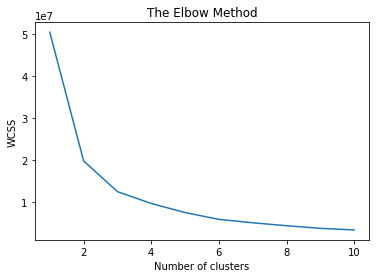

In [34]:

#model building 
# K - Means Clustering Model
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [36]:
y_kmeans

array([0, 0, 0, ..., 2, 0, 0])

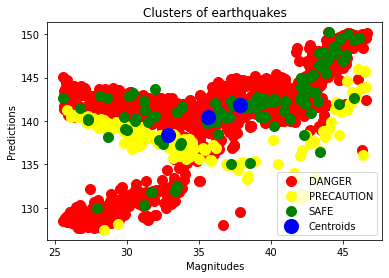

In [37]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'Red', label = 'DANGER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'PRECAUTION')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'SAFE')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'blue', label = 'Centroids')
plt.title('Clusters of earthquakes')
plt.xlabel('Magnitudes')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [38]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
x_train.shape

(2028, 9)

In [40]:
y_train.shape

(2028,)

In [41]:
x_test.shape

(507, 9)

In [42]:
y_test.shape

(507,)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
# KNN -> Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = classifier.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  2   1   0]
 [  0  33   6]
 [  0   6 459]]


0.9743589743589743

In [47]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [48]:
x, y = make_classification(n_samples=5000, n_features=10, 
                           n_classes=3, 
                           n_clusters_per_class=1)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [50]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [51]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.9037647058823529


C:\Users\ahema\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
from sklearn.cluster import SpectralClustering

In [53]:

spectral_cluster_model= SpectralClustering(
    n_clusters=3, 
    random_state=25, 
    n_neighbors=10, 
    affinity='nearest_neighbors'
)

In [54]:
updatedDf['predictions'] = updatedDf['predictions'].astype(float)

In [55]:
updatedDf['cluster'] = spectral_cluster_model.fit_predict(updatedDf[['mag', 'predictions']])

C:\Users\ahema\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[Text(0.5, 1.0, 'Spectral Clustering')]

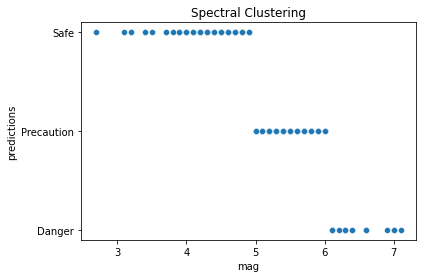

In [56]:
fig, ax = plt.subplots()
sns.scatterplot(x='mag', y='predictions', data=df, ax=ax)
ax.set(title='Spectral Clustering')

In [57]:
updatedDf = updatedDf.drop("horizontalError", axis=1)

In [58]:
updatedDf = updatedDf.drop("depthError", axis=1)

In [59]:
updatedDf = updatedDf.drop("rms", axis=1)

In [60]:
updatedDf = updatedDf.drop("magError", axis=1)

In [61]:
updatedDf = updatedDf.drop("magNst", axis=1)


In [62]:
updatedDf = updatedDf.drop("cluster", axis=1)


In [63]:
updatedDf

,latitude,longitude,depth,mag,predictions
0,35.6831,140.2344,66.24,4.4,2.0
1,39.4417,143.6408,21.01,4.5,2.0
2,33.0514,130.4705,10.00,4.7,2.0
3,30.3888,138.0987,451.33,4.0,2.0
4,32.8198,140.1248,98.35,4.3,2.0
...,...,...,...,...,...
2530,35.2206,141.3344,26.93,4.5,2.0
2531,35.5454,139.0111,26.93,4.5,2.0
2532,45.7785,142.5889,315.88,4.6,2.0
2533,35.5609,138.9939,22.08,4.4,2.0


In [64]:
X=updatedDf.iloc[:,:-1]
y=updatedDf.iloc[:,-1]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [67]:
X_train

,latitude,longitude,depth,mag
1919,27.6974,139.9898,492.44,4.1
359,37.2462,134.9600,374.01,4.0
369,43.1475,142.6118,128.98,4.3
309,29.9776,142.4918,10.00,4.5
2352,28.1560,139.7932,407.15,4.1
...,...,...,...,...
1033,27.6650,140.0144,485.86,4.1
1731,38.6524,141.9340,50.08,4.1
763,43.4384,147.6467,10.00,4.6
835,26.1270,128.4200,10.00,4.5


In [68]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1774, 4), (1774,), (761, 4), (761,))

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


clf.fit(X_train,y_train)


RandomForestClassifier()

In [70]:
y_pred=clf.predict(X_test)

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [72]:
import pickle as pkl

In [73]:
import joblib
joblib.dump(clf,'clf_pickle.pkl')

['clf_pickle.pkl']

In [74]:
model=joblib.load('clf_pickle.pkl')

In [75]:
y_prediction=model.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,confusion_matrix

In [77]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00        80
         2.0       1.00      1.00      1.00       677

    accuracy                           1.00       761
   macro avg       1.00      1.00      1.00       761
weighted avg       1.00      1.00      1.00       761



In [78]:
joblib.dump(clf,'tfidf_pickle.pkl')

['tfidf_pickle.pkl']